<a href="https://colab.research.google.com/github/dl0312/19_system_programming_cse4100/blob/master/Machine%20Learning/cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
import os

from IPython.display import SVG
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

Using TensorFlow backend.


In [0]:
def plot_images(x, y_true, y_pred=None, size=(5, 5)):
    assert len(x) == len(y_true) == size[0] * size[1]
    
    fig, axes = plt.subplots(size[0], size[1])
    fig.subplots_adjust(hspace=1, wspace=1.5)
    
    for i, ax in enumerate(axes.flat):
        if x[i].shape[-1] == 1:
            ax.imshow(x[i].reshape(x[i].shape[0], x[i].shape[1]))
        else:
            ax.imshow(x[i])
            
        if y_pred is None:
            xlabel = "True: {0}".format(y_true[i].argmax())
        else:
            xlabel = "True: {0}, Pred: {1}".format(y_true[i].argmax(),
                                                  y_pred[i].argmax())
        
        ax.set_xlabel(xlabel)
        
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

In [0]:
epochs = 100
learning_rate = 0.0001
decay = 1e-6

In [0]:
batch_size = 32
num_classes = 10

In [0]:
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [6]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


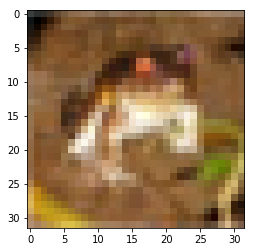

In [7]:
plt.imshow(x_train[0])
plt.show()

In [8]:
# normalize x data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()

In [11]:

model.add(Conv2D(32,
                 (3, 3),
                 padding='same',
                 activation="relu",
                 input_shape=x_train.shape[1:]))
model.add(Conv2D(32,
                 (3, 3),
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(64, (3, 3), padding='same', 
                 activation="relu"))
model.add(Conv2D(64, (3, 3), 
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(512,
                activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes,
               activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
optimizer = keras.optimizers.rmsprop(lr=learning_rate, decay=decay)

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [14]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,
                       validation_steps=None,
                       steps_per_epoch=len(x_train) / 64)

Using real-time data augmentation.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
782/781 [==============================] - 30s 39ms/step - loss: 1.9878 - acc: 0.2686 - val_loss: 1.7004 - val_acc: 0.3916
Epoch 2/100
782/781 [==============================] - 25s 32ms/step - loss: 1.7139 - acc: 0.3733 - val_loss: 1.5851 - val_acc: 0.4266
Epoch 3/100
782/781 [==============================] - 24s 31ms/step - loss: 1.6016 - acc: 0.4158 - val_loss: 1.4551 - val_acc: 0.4796
Epoch 4/100
782/781 [==============================] - 25s 31ms/step - loss: 1.5354 - acc: 0.4416 - val_loss: 1.3791 - val_acc: 0.4962
Epoch 5/100
782/781 [==============================] - 24s 31ms/step - loss: 1.4891 - acc: 0.4632 - val_loss: 1.3442 - val_acc: 0.5232
Epoch 6/100
782/781 [==============================] - 24s 31ms/step - loss: 1.4339 - acc: 0.4844 - val_loss: 1.2780 - val_acc: 0.5438
Epoch 7/100
782/781 [==============================] - 24s 31ms/step - loss: 1.3919 - acc: 0.5022 - val_los

In [25]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 


In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7027495085716248
Test accuracy: 0.7778


In [0]:
y_pred = model.predict(x_test)

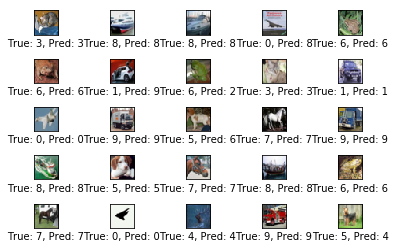

In [18]:
plot_images(x=x_test[:25], y_true=y_test[:25], y_pred=y_pred[:25])